# Notebook Instructions
<i>You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
plt.style.use('seaborn-darkgrid')

## Get historical data for the instruments

In [5]:
x = pd.read_csv('EWA.csv',index_col=0)['Adj Close']
y = pd.read_csv('EWC.csv',index_col=0)['Adj Close']    

df = pd.concat([y,x],axis=1)
df.columns = ['EWC','EWA']
df.index = pd.to_datetime(df.index, yearfirst=True)
df

,EWC,EWA
Date,,
2014-12-31,25.68,17.26
2015-01-02,25.53,17.21
2015-01-05,24.84,17.05
2015-01-06,24.48,16.98
2015-01-07,24.51,17.13
...,...,...
2020-06-11,24.99,18.57
2020-06-12,25.42,18.92
2020-06-15,25.65,19.18


## Find hedge ratio

In [6]:
import statsmodels.api as sm
# OLS(Y,X)
model = sm.OLS(df.EWC.iloc[:90], df.EWA.iloc[:90])
model = model.fit() 
'The hedge ratio is %.2f' % model.params[0]

'The hedge ratio is 1.38'

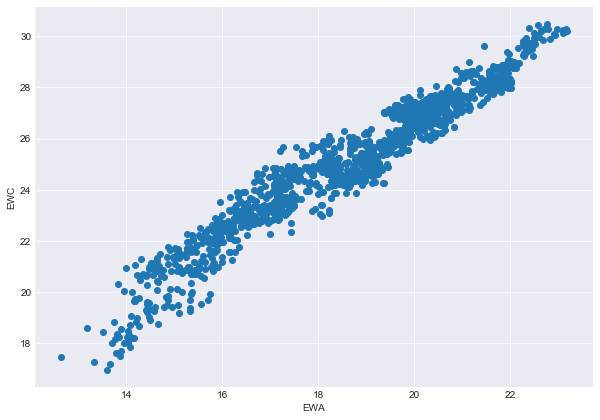

In [7]:
plt.figure(figsize=(10,7))
# scatter(X,Y)
plt.scatter(df.EWA,df.EWC)
plt.plot()
plt.xlabel('EWA')
plt.ylabel('EWC')
plt.show()

## Form the spread

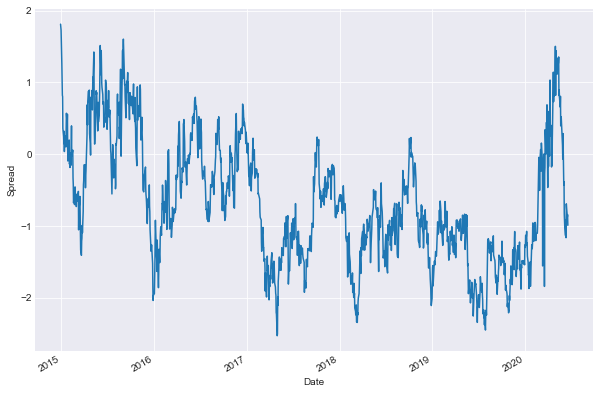

In [8]:
df['spread'] = df.EWC - model.params[0] * df.EWA
# Plot the spread
df.spread.plot(figsize=(10,7))
plt.ylabel("Spread")
plt.show()

In [9]:
# To perform ADF Test
from statsmodels.tsa.stattools import adfuller
# Compute ADF test statistics
adf = adfuller(df.spread, maxlag = 1)
adf[0]

-4.557601185711815

In [10]:
adf[4]

{'1%': -3.4351217173485766,
 '5%': -2.8636473597946974,
 '10%': -2.567891956216259}